In [134]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [135]:
# Reading the csv file
df= pd.read_csv("movies.csv")

# Getting the information about tehe csv file: its info and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


(7668, 15)

In [136]:
# Seeing the top 5 elements of the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [137]:
# Checking for the count of the null values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [138]:
# Calculate mean for each column
mean_votes = df['votes'].mean()
mean_budget = df['budget'].mean()
mean_gross = df['gross'].mean()
mean_score = df['score'].mean()
mean_runtime = df['runtime'].mean()

# Fill missing values with the mean
df['votes'].fillna(mean_votes, inplace=True)
df['budget'].fillna(mean_budget, inplace=True)
df['gross'].fillna(mean_gross, inplace=True)
df['score'].fillna(mean_score, inplace=True)
df['runtime'].fillna(mean_runtime, inplace=True)
df['votes'].astype('int')
df['budget'].astype('int')
df['gross'].astype('int')
df['score'].astype('int')
df['runtime'].astype('int')

c:\Users\bansa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


0       146
1       104
2       124
3        88
4        98
       ... 
7663     90
7664     90
7665    107
7666    120
7667    102
Name: runtime, Length: 7668, dtype: int32

In [139]:
# Dropping the rows with missing string values as the count is too low
df.dropna(inplace=True)

In [140]:
# Checking for the count of the null values again
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [141]:
# Remove parentheses and their content using regular expression
df['released'] = df['released'].apply(lambda x: re.sub(r'\([^)]*\)', '', x))

# Convert date string to YYYY-MM-DD format
df['released'] = pd.to_datetime(df['released']).dt.strftime('%Y-%m-%d')

In [142]:
# Creating a column for the released year
df['releasedYear'] = df['released'].astype(str).str[:4]

In [143]:
# Removing the duplciates values if any
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2340, dtype: object

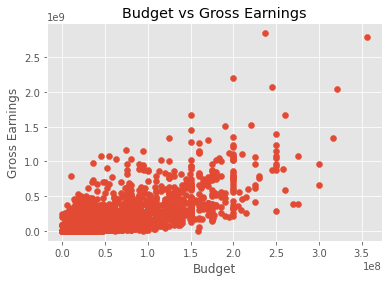

In [144]:
# Create a scatter plot to visualize the relationship between Budget and Gross Earnings
plt.scatter(x=df['budget'], y=df['gross'])

# Set the title of the plot
plt.title('Budget vs Gross Earnings')

# Set the label for the x-axis and y-axis
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Budget vs Gross Earnings with Regression Line')

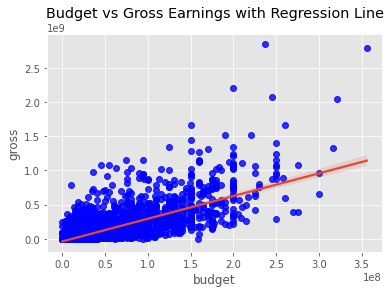

In [145]:
# Create a scatter plot with a regression line using Seaborn's regplot
sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"blue"})

# Set the title of the plot
plt.title('Budget vs Gross Earnings with Regression Line')

In [146]:
# Getting the correlation using Pearson method
df.corr(method='pearson')

C:\Users\bansa\AppData\Local\Temp\ipykernel_8272\1030146276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.102154,0.226789,0.268848,0.254159,0.120810
score,0.102154,1.000000,0.411938,0.064654,0.185084,0.400526
votes,0.226789,0.411938,1.000000,0.421218,0.629325,0.309353
budget,0.268848,0.064654,0.421218,1.000000,0.712561,0.265934
gross,0.254159,0.185084,0.629325,0.712561,1.000000,0.241618
runtime,0.120810,0.400526,0.309353,0.265934,0.241618,1.000000


In [147]:
# Getting the correlation using Kendall method
df.corr(method='kendall')

C:\Users\bansa\AppData\Local\Temp\ipykernel_8272\900769516.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.070426,0.339303,0.145845,0.185413,0.097034
score,0.070426,1.000000,0.303963,0.002838,0.083285,0.284044
votes,0.339303,0.303963,1.000000,0.166428,0.513297,0.198416
budget,0.145845,0.002838,0.166428,1.000000,0.263041,0.162957
gross,0.185413,0.083285,0.513297,0.263041,1.000000,0.157671
runtime,0.097034,0.284044,0.198416,0.162957,0.157671,1.000000


In [148]:
# Getting the correlation using Spearman method
df.corr(method='spearman')

C:\Users\bansa\AppData\Local\Temp\ipykernel_8272\1886786014.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,year,score,votes,budget,gross,runtime
year,1.000000,0.103134,0.482970,0.204878,0.271661,0.142839
score,0.103134,1.000000,0.433408,0.003744,0.122304,0.400508
votes,0.482970,0.433408,1.000000,0.241570,0.696280,0.290614
budget,0.204878,0.003744,0.241570,1.000000,0.368012,0.229821
gross,0.271661,0.122304,0.696280,0.368012,1.000000,0.230240
runtime,0.142839,0.400508,0.290614,0.229821,0.230240,1.000000


C:\Users\bansa\AppData\Local\Temp\ipykernel_8272\762684855.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


<Axes: >

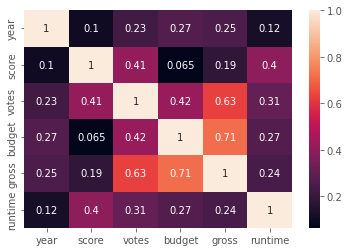

In [149]:
# Plotting a heatmap based on the correlation matrix
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

In [150]:
# Numerizing the data columns
df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col]= df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedYear
0,6508,6,6,1980,16,8.400000,9.270000e+05,2545,3960,1022,54,1.900000e+07,4.699877e+07,2274,146.0,0
1,5500,6,1,1980,20,5.800000,6.500000e+04,2234,1613,316,55,4.500000e+06,5.885311e+07,710,104.0,0
2,5075,4,0,1980,17,8.700000,1.200000e+06,1093,2535,1708,55,1.800000e+07,5.383751e+08,1506,124.0,0
3,282,4,4,1980,20,7.700000,2.210000e+05,1279,1976,2198,55,3.500000e+06,8.345354e+07,1770,88.0,0
4,1016,6,4,1980,24,7.300000,1.080000e+05,1037,511,398,55,6.000000e+06,3.984634e+07,1737,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6401,6,5,2020,2906,5.400000,2.400000e+03,2476,3828,2386,55,3.558988e+07,3.661000e+03,1861,98.0,40
7656,6938,5,4,2020,2908,5.000000,2.940000e+02,2471,3821,2327,55,3.558988e+07,4.133780e+05,1863,120.0,40
7658,789,6,6,2020,2900,6.600000,3.500000e+01,1740,1052,515,55,5.000000e+03,7.850054e+07,1710,78.0,40
7659,2626,3,9,2020,2904,3.400000,4.470000e+02,1586,2435,1500,55,3.558988e+07,1.326600e+04,1949,87.0,40


In [151]:
# Getting the correlation between the numerized data
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releasedYear
name,1.000000,-0.011944,0.015250,0.013483,0.013305,0.016160,0.013174,0.009605,0.010271,0.005666,-0.009942,0.020954,0.005071,0.010085,0.011130,0.012680
rating,-0.011944,1.000000,0.117657,0.025120,0.023653,0.011562,0.016092,0.017211,-0.004538,0.005972,0.037765,-0.156385,-0.129384,-0.076860,0.069152,0.025343
genre,0.015250,0.117657,1.000000,-0.088103,-0.084202,0.040281,-0.148341,-0.013502,0.006956,-0.003450,-0.031503,-0.316818,-0.238240,-0.068755,-0.044531,-0.084491
year,0.013483,0.025120,-0.088103,1.000000,0.997156,0.102154,0.226789,-0.022740,-0.012450,-0.027507,-0.070084,0.268848,0.254159,-0.009181,0.120810,0.997468
released,0.013305,0.023653,-0.084202,0.997156,1.000000,0.111084,0.221888,-0.023020,-0.012945,-0.027514,-0.080419,0.263436,0.249396,-0.015549,0.123221,0.999329
score,0.016160,0.011562,0.040281,0.102154,0.111084,1.000000,0.411938,0.008074,0.018887,-0.002196,-0.130144,0.064654,0.185084,0.000325,0.400526,0.109625
votes,0.013174,0.016092,-0.148341,0.226789,0.221888,0.411938,1.000000,-0.000628,0.000133,-0.020975,0.069563,0.421218,0.629325,0.129579,0.309353,0.222215
director,0.009605,0.017211,-0.013502,-0.022740,-0.023020,0.008074,-0.000628,1.000000,0.297418,0.037564,0.015242,-0.010373,-0.014106,0.001328,0.017403,-0.022072
writer,0.010271,-0.004538,0.006956,-0.012450,-0.012945,0.018887,0.000133,0.297418,1.000000,0.026462,0.014936,-0.033407,-0.023732,0.003174,-0.004657,-0.012145
star,0.005666,0.005972,-0.003450,-0.027507,-0.027514,-0.002196,-0.020975,0.037564,0.026462,1.000000,-0.017577,-0.017244,-0.002506,0.009243,0.008550,-0.027922


In [152]:
# Getting the correlation pairs of the numerized data
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name          name            1.000000
              rating         -0.011944
              genre           0.015250
              year            0.013483
              released        0.013305
                                ...   
releasedYear  budget          0.262773
              gross           0.247520
              company        -0.014204
              runtime         0.120502
              releasedYear    1.000000
Length: 256, dtype: float64

In [153]:
# showing the correlation pairs in a sorted manner
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.316818
budget        genre          -0.316818
genre         gross          -0.238240
gross         genre          -0.238240
rating        budget         -0.156385
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
releasedYear  releasedYear    1.000000
Length: 256, dtype: float64